# Calculating ROC curves from the DUD-E dataset

In [1]:
from oddt.metrics import roc
from oddt.metrics import auc
import pandas
import matplotlib.pyplot as plt
import numpy as np

def plot_roc(ax, title, tpr, fpr, auc):
    """Basic settings for the ROC plot."""
    # Plot figure
    lw = 2
    ax.plot(tpr, fpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(title)
    ax.legend(loc='lower right')


def calc_roc_auc(protein_name):
    """Main method for calculating ROC/AUC."""
    # Dictionary to store scores
    scores = {}
    # Import data
    actives = pandas.read_csv(protein_name + "/actives_docked.csv")
    decoys = pandas.read_csv(protein_name + "/decoys_docked.csv")
    # Activity labels
    labels = np.concatenate((np.ones(len(actives)), np.zeros(len(decoys))), axis=0)
    # Combined active and decoy scores
    scores['nnscore'] = np.concatenate((actives['nnscore'], decoys['nnscore']), axis=0)
    scores['rfscore'] = np.concatenate((actives['rfscore_v1'], decoys['rfscore_v1']), axis=0)
    # We take the negative value of the vina scores
    scores['vina'] = np.concatenate((-actives['vina_affinity'], -decoys['vina_affinity']), axis=0)
    # Prepare plot
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))  
    # Calculate ROC and AUC
    for i in range(3):
        tpr, fpr, mse = roc(labels, scores[list(scores.keys())[i]])
        roc_auc = auc(tpr, fpr)
        plot_roc(axes[i], list(scores.keys())[i], tpr, fpr, roc_auc)
    plt.savefig( protein_name + ".svg", format='svg')

RDKit WARNING: [12:33:19] Enabling RDKit 2019.09.1 jupyter extensions


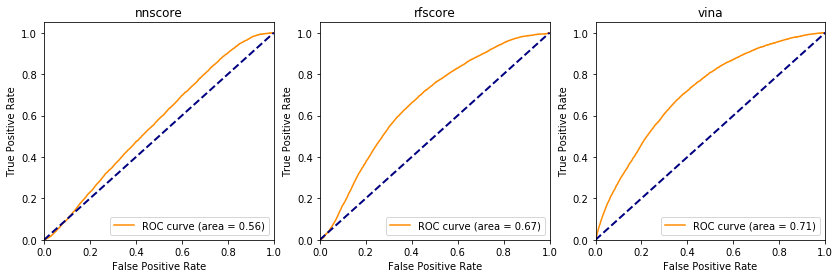

In [2]:
calc_roc_auc('aa2r')

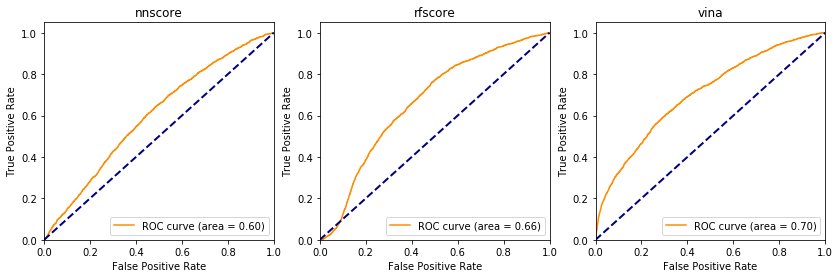

In [3]:
calc_roc_auc('abl1')